<a href="https://colab.research.google.com/github/reginaxy/Hotel_Analysis/blob/main/Logistic_Regression_(Model_Tuning)_Sentiment_Analysis_(TFIDF).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries, Packages, and Data**

**Import Libraries & Packages**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier

seed = 4353

**Mount to GDrive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Import Data**

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/Hotel_Analysis/Hotel_Datasets/515k_Hotel_Reviews_SENTIMENTS_40tokens.csv'
df = pd.read_csv(path)
df

,Review_Date,Hotel_Country,Hotel_Name,Sentiments,Reviewer_Nationality,Review,cleaned_Reviews
0,2017-07-24,Netherlands,Hotel Arena,Negative,Poland,Backyard of the hotel is total mess shouldn t...,backyard hotel total mess happen hotel star
1,2017-07-17,Netherlands,Hotel Arena,Negative,United Kingdom,Cleaner did not change our sheet and duvet ev...,cleaner change sheet duvet everyday made bed a...
2,2017-07-17,Netherlands,Hotel Arena,Negative,United Kingdom,Apart from the price for the brekfast Everyth...,apart price brekfast good
3,2017-09-07,Netherlands,Hotel Arena,Negative,Belgium,Even though the pictures show very clean room...,even though picture show clean room actual roo...
4,2017-08-07,Netherlands,Hotel Arena,Negative,Norway,The aircondition makes so much noise and its ...,aircondition make noise hard sleep night
...,...,...,...,...,...,...,...
545176,2015-07-09,Austria,Atlantis Hotel Vienna,Positive,Germany,Good breakfast,good breakfast
545177,2015-06-09,Austria,Atlantis Hotel Vienna,Positive,Kuwait,helpful staff allowed me to check in early as...,helpful staff allowed check early arrived chec...
545178,2015-08-22,Austria,Atlantis Hotel Vienna,Positive,Estonia,Breakfast was ok and we got earlier check in,breakfast ok got earlier check
545179,2015-08-17,Austria,Atlantis Hotel Vienna,Positive,Mexico,The rooms are enormous and really comfortable...,room enormous comfortable believe family membe...


**First 5 rows of Data**

In [ ]:
df.head()

,Review_Date,Hotel_Country,Hotel_Name,Sentiments,Reviewer_Nationality,Review,cleaned_Reviews
0,2017-07-24,Netherlands,Hotel Arena,Negative,Poland,Backyard of the hotel is total mess shouldn t...,backyard hotel total mess happen hotel star
1,2017-07-17,Netherlands,Hotel Arena,Negative,United Kingdom,Cleaner did not change our sheet and duvet ev...,cleaner change sheet duvet everyday made bed a...
2,2017-07-17,Netherlands,Hotel Arena,Negative,United Kingdom,Apart from the price for the brekfast Everyth...,apart price brekfast good
3,2017-09-07,Netherlands,Hotel Arena,Negative,Belgium,Even though the pictures show very clean room...,even though picture show clean room actual roo...
4,2017-08-07,Netherlands,Hotel Arena,Negative,Norway,The aircondition makes so much noise and its ...,aircondition make noise hard sleep night


**Overview of Data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545181 entries, 0 to 545180
Data columns (total 7 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Review_Date           545181 non-null  object
 1   Hotel_Country         545181 non-null  object
 2   Hotel_Name            545181 non-null  object
 3   Sentiments            545181 non-null  object
 4   Reviewer_Nationality  545181 non-null  object
 5   Review                545181 non-null  object
 6   cleaned_Reviews       545181 non-null  object
dtypes: object(7)
memory usage: 29.1+ MB


### **Data Selection & Preparation**

**Defining predictor & Target variable**

In [ ]:
# Defining predictor & Target variable

X = df['cleaned_Reviews'] # predictor variable
y = df['Sentiments'] # target variable

**Split dataset into training and testing sets**

Training set - 70%

Testing set - 30%

In [ ]:
# Split dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state= seed)

**Data Shape**

In [ ]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(381626, 45265) (381626,)
(163555, 45265) (163555,)


**Counts of Positive and Negative Sentiments in Training set**

In [ ]:
y_train.value_counts(normalize=True)

Positive    0.58664
Negative    0.41336
Name: Sentiments, dtype: float64

# **Results of Original Logistic Regression model built**

Results obtained from workbook **'Sentiment Analysis (TF-IDF)'**

**Load the original model from disk & Display Accuracy score**

In [ ]:
import pickle
# load the original model from disk
filename = '/content/drive/MyDrive/Colab Notebooks/Hotel_Analysis/Sentiment Analysis/Sentiment Models/LR_SentAnalysis.sav'
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print ("Accuracy:", result)

Accuracy: 0.9328421631866957


**Construct the classification report , accuracy & F1 score**

In [ ]:
# Construct the classification report , accuracy & F1 score

predictions = loaded_model.predict(X_test)

print(classification_report(y_test, predictions))

lr_f1 = round(f1_score(y_test, predictions, average= 'weighted'), 3)
lr_accuracy = round((accuracy_score(y_test, predictions) * 100), 2)

print("Accuracy : " , lr_accuracy , " %")
print("f1_score : " , lr_f1)

              precision    recall  f1-score   support

    Negative       0.91      0.93      0.92     67789
    Positive       0.95      0.94      0.94     95766

    accuracy                           0.93    163555
   macro avg       0.93      0.93      0.93    163555
weighted avg       0.93      0.93      0.93    163555

Accuracy :  93.28  %
f1_score :  0.933


**Construct the Confusion Matrix**

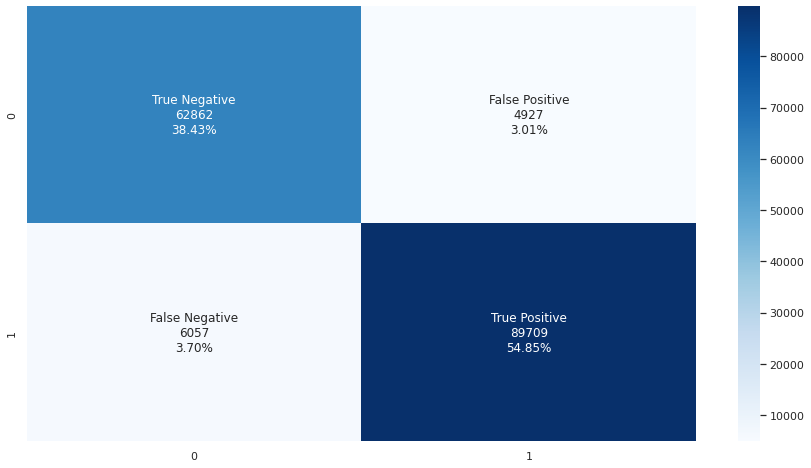

In [ ]:
# Construct the Confusion Matrix

predictions = loaded_model.predict(X_test)
cm = confusion_matrix(y_test, predictions)

names = ['True Negative','False Positive','False Negative','True Positive']

counts = ['{0:0.0f}'.format(value) for value in
                cm.flatten()]

percentages = ['{0:.2%}'.format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(names, counts, percentages)]

labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
sns.set(rc = {'figure.figsize':(15,8)})

**Model Results:** 

From our previously built LR model, we managed to achieve an accuracy, precision, recall and F1-score of 93%.

In addition, we have 3.70% of False Negative results and 3.01% of False Positive results.

In the next steps, we will be tuning our TF-IDF vectorizer parameters to check if any further improvements can be made to the model performance.

# **Tuning Parameters of TF-IDF vectorizer**

## **Testing on different Ngrams ranges**

ngram_range: tuple (min_n, max_n), default=(1, 1)

The lower and upper boundary of the range of n-values for different n-grams to be extracted.

**E.g.**

'Welcome to python'

one-grams : 'welcome', 'to', 'python'

two-grams : 'welcome to', 'python'

and so on...

**Include 1-grams only (Default)**

In [ ]:
# include 1-grams only (Default)

lr = Pipeline([('Vect',TfidfVectorizer(ngram_range=(1, 1))),
                  ('model',LogisticRegression(solver='lbfgs', max_iter=1000))])

lr.fit(X_train, y_train)

# Calculate Accuracy
print ("Accuracy:", lr.score(X_test, y_test))

Accuracy: 0.9328421631866957


**Include 1-grams & 2- grams**

In [ ]:
# include 1-grams & 2- grams

lr = Pipeline([('Vect',TfidfVectorizer(ngram_range=(1, 2))),
                  ('model',LogisticRegression(solver='lbfgs', max_iter=1000))])

lr.fit(X_train, y_train)

# Calculate Accuracy
print ("Accuracy:", lr.score(X_test, y_test))

Accuracy: 0.9383021002109382


**Include 1-grams to 3-grams**

In [ ]:
# include 1-grams to 3-grams

lr = Pipeline([('Vect',TfidfVectorizer(ngram_range=(1, 3))),
                  ('model',LogisticRegression(solver='lbfgs', max_iter=1000))])

lr.fit(X_train, y_train)

# Calculate Accuracy
print ("Accuracy:", lr.score(X_test, y_test))

Accuracy: 0.9368713888294458


**Include 1-grams to 4-grams**

In [ ]:
# include 1-grams to 4-grams

lr = Pipeline([('Vect',TfidfVectorizer(ngram_range=(1, 4))),
                  ('model',LogisticRegression(solver='lbfgs', max_iter=1000))])

lr.fit(X_train, y_train)

# Calculate Accuracy
print ("Accuracy:", lr.score(X_test, y_test))

Accuracy: 0.9358075265201309


**Results:** 

We observe that ngram_range=(1, 2) managed to give us the highest accuracy of 0.938 out of the other ngram ranges.

##**Testing on different Max document frequency (DF) values**

max_df: float in range [0.0, 1.0] or int, default=1.0

When building the vocabulary, ignore terms that have a document frequency strictly higher than the given threshold.

**E.g.**

0.25 --> Ignore terms that appear in more than 25% of the documents

0.50 --> Ignore terms that appear in more than 50% of the documents

**Ignore terms that appear in more than 25% of the documents**

In [ ]:
# ignore terms that appear in more than 25% of the documents

lr = Pipeline([('Vect',TfidfVectorizer(max_df=0.25)),
                  ('model',LogisticRegression(solver='lbfgs', max_iter=1000))])

lr.fit(X_train, y_train)

# Calculate Accuracy
print ("Accuracy:", lr.score(X_test, y_test))

Accuracy: 0.9311240866986641


**Ignore terms that appear in more than 50% of the documents**

In [ ]:
# ignore terms that appear in more than 50% of the documents

lr = Pipeline([('Vect',TfidfVectorizer(max_df=0.5)),
                  ('model',LogisticRegression(solver='lbfgs', max_iter=1000))])

lr.fit(X_train, y_train)

# Calculate Accuracy
print ("Accuracy:", lr.score(X_test, y_test))

Accuracy: 0.9328421631866957


**Ignore terms that appear in more than 75% of the documents**

In [ ]:
# ignore terms that appear in more than 75% of the documents

lr = Pipeline([('Vect',TfidfVectorizer(max_df=0.75)),
                  ('model',LogisticRegression(solver='lbfgs', max_iter=1000))])

lr.fit(X_train, y_train)

# Calculate Accuracy
print ("Accuracy:", lr.score(X_test, y_test))

Accuracy: 0.9328421631866957


**Ignore terms that appear in more than 100% of the documents (default)**

In [ ]:
# ignore terms that appear in more than 100% of the documents (default)

lr = Pipeline([('Vect',TfidfVectorizer(max_df=1.00)),
                  ('model',LogisticRegression(solver='lbfgs', max_iter=1000))])

lr.fit(X_train, y_train)

# Calculate Accuracy
print ("Accuracy:", lr.score(X_test, y_test))

Accuracy: 0.9328421631866957


**Results:**

We observe that when we ignore terms that appear in more than 50% of the documents (max_df = 0.5), it gave us an accuracy of 0.9328. It managed to retain at this accuracy rate when we increase max_df to 0.75 & 1.00. 

## **Testing on different Min document frequency (DF) values**

min_df: float in range [0.0, 1.0] or int, default=1

When building the vocabulary, ignore terms that have a document frequency strictly lower than the given threshold. 

(This value is also called "cut-off" in the literature.)

**E.g.**

2 --> only keep terms that appear in at least 2 documents

3 --> only keep terms that appear in at least 3 documents

**Only keep terms that appear in at least 2 documents**

In [ ]:
# only keep terms that appear in at least 2 documents

lr = Pipeline([('Vect',TfidfVectorizer(min_df=2)),
                  ('model',LogisticRegression(solver='lbfgs', max_iter=1000))])

lr.fit(X_train, y_train)

# Calculate Accuracy
print ("Accuracy:", lr.score(X_test, y_test))

Accuracy: 0.9326831952554187


**Only keep terms that appear in at least 3 documents**

In [ ]:
# only keep terms that appear in at least 3 documents

lr = Pipeline([('Vect',TfidfVectorizer(min_df=3)),
                  ('model',LogisticRegression(solver='lbfgs', max_iter=1000))])

lr.fit(X_train, y_train)

# Calculate Accuracy
print ("Accuracy:", lr.score(X_test, y_test))

Accuracy: 0.9327015377090275


**Only keep terms that appear in at least 5 documents**

In [ ]:
# only keep terms that appear in at least 5 documents

lr = Pipeline([('Vect',TfidfVectorizer(min_df=5)),
                  ('model',LogisticRegression(solver='lbfgs', max_iter=1000))])

lr.fit(X_train, y_train)

# Calculate Accuracy
print ("Accuracy:", lr.score(X_test, y_test))

Accuracy: 0.932634282045795


**Results:**

We observe that when we keep only terms that appear in at least 3 documents (min_df = 3), it gave us the highest accuracy of 0.9327. 

# **Combining all best results (Optimal Model)**

Upon trial and error on different parameters, we discover that these parameters managed to give us the best results:

1. Include 1-grams to 2-grams (acc = 93.8%) 
2. Ignore terms that appear in more than 50% of the documents (acc = 93.3%)
3. only keep terms that appear in at least 3 documents (acc = 93.3%)

Hence, **we will be combining all three of these parameters to build a new improvised LR model, then observe if any improvements were made to the model result.**

In [ ]:
# include 1-grams to 2-grams
# ignore terms that appear in more than 50% of the documents
# only keep terms that appear in at least 3 documents

lr = Pipeline([('Vect',TfidfVectorizer(ngram_range=(1, 2), min_df=3, max_df=0.5)),
                  ('model',LogisticRegression(solver='lbfgs', max_iter=1000))])

lr.fit(X_train, y_train)

# Calculate Accuracy
print ("Accuracy:", lr.score(X_test, y_test))

Accuracy: 0.9389807709944666


**Save the model to disk**

In [ ]:
import pickle

# save the model to disk
filename = '/content/drive/MyDrive/Colab Notebooks/Hotel_Analysis/Sentiment Analysis/Sentiment Models/LR_SentAnalysis_IMPROVED.sav'
pickle.dump(lr, open(filename, 'wb'))

As a result of tuning the LR model, we managed to achieve an **improved accuracy rate of 93.9%** (as compared to the original 93.3%) 

Hence, we will be looking further into the other performance metrices of this improvised model and make comparisons to the original version.

**Construct the classification report , accuracy & F1 score**

In [ ]:
# Construct the classification report , accuracy & F1 score

predictions = lr.predict(X_test)

print(classification_report(y_test, predictions))

lr_f1 = round(f1_score(y_test, predictions, average= 'weighted'), 3)
lr_accuracy = round((accuracy_score(y_test, predictions) * 100), 2)

print("Accuracy : " , lr_accuracy , " %")
print("f1_score : " , lr_f1)

              precision    recall  f1-score   support

    Negative       0.92      0.93      0.93     67789
    Positive       0.95      0.94      0.95     95766

    accuracy                           0.94    163555
   macro avg       0.94      0.94      0.94    163555
weighted avg       0.94      0.94      0.94    163555

Accuracy :  93.9  %
f1_score :  0.939


Negative Predictions Precision **improved from 91% to 92%**.

Negative Predictions F1-score **improved from 92% to 93%**.

Overall Accuracy **improved from 93% to 94%**.

**Construct the Confusion Matrix**

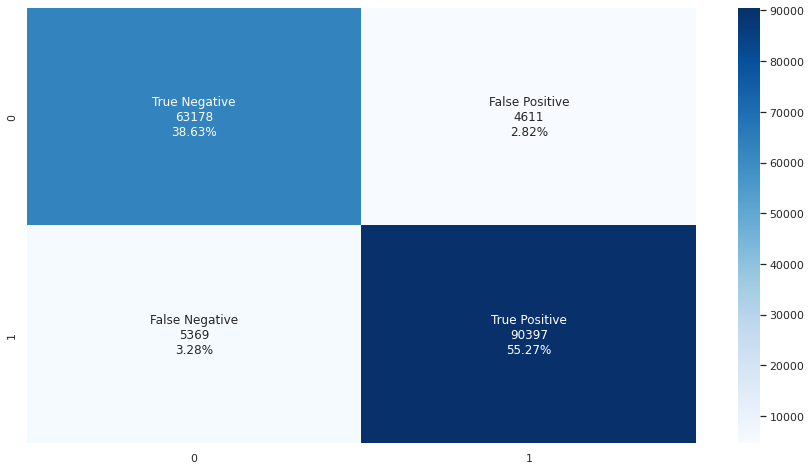

In [ ]:
# Construct the Confusion Matrix
predictions = lr.predict(X_test)
cm = confusion_matrix(y_test, predictions)

names = ['True Negative','False Positive','False Negative','True Positive']

counts = ['{0:0.0f}'.format(value) for value in
                cm.flatten()]

percentages = ['{0:.2%}'.format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(names, counts, percentages)]

labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

sns.set(rc = {'figure.figsize':(15,8)})

False Negative **reduced from 3.70% to 3.28%.**

False Positive **reduced from 3.01% to 2.82%.**

**Testing out the model built**

fitting in some random reviews to predict their sentiments


In [ ]:
lr.predict(['the service is fantastic', 'the staff was unfriendly', 'slow service', 'beautiful scenery', 'the scenery was gorgeous', 'the manager was very rude'])

array(['Positive', 'Negative', 'Negative', 'Positive', 'Positive',
       'Negative'], dtype=object)